# SI 618 - Machine Learning: Clustering

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide01.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide02.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide03.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide01.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide04.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide07.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide09.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide10.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide11.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide12.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide13.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide14.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide15.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide16.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide17.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide18.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide19.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide20.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide21.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide22.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide23.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide24.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide25.png)

In [41]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

import pandas as pd
import seaborn as sns

In [42]:
music = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR4YaVmpag6ucq-Q62adFm8oQz2YQRE7jsiTdE3S8-uxEj8dV6W_rbLHh0AMM4AKeibsDZLWXHQU0rT/pub?gid=0&single=true&output=csv')

In [43]:
music.head()

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
0,Chris T,7,10,4,3,6,4,10,4,6,8
1,Taylor F.,8,6,5,5,10,6,4,9,8,10
2,Briana W,6,3,2,3,2,10,7,6,8,9
3,Katie H.,3,5,6,5,6,8,2,9,9,10
4,N8 May,4,5,2,10,2,8,3,4,6,8


In [44]:
music = music.dropna() # Clustering doesn't like NaNs
music_names = music['Name']
music_nonames = music.drop('Name',axis=1)

In [45]:
music_names.head()

0      Chris T
1    Taylor F.
2     Briana W
3     Katie H.
4       N8 May
Name: Name, dtype: object

In [46]:
music_nonames.head()

,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
0,7,10,4,3,6,4,10,4,6,8
1,8,6,5,5,10,6,4,9,8,10
2,6,3,2,3,2,10,7,6,8,9
3,3,5,6,5,6,8,2,9,9,10
4,4,5,2,10,2,8,3,4,6,8


In [47]:
model = AgglomerativeClustering(n_clusters=3) # we can make up the value for clusters
model.fit_predict(music_nonames)

array([2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 1, 0, 2,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 0, 1])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

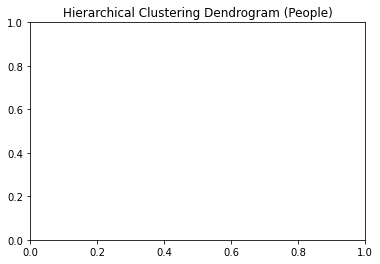

In [48]:
# Authors: Mathew Kallada & Chris Teplovs
# License: BSD 3 clause
"""
=========================================
Plot Hierarachical Clustering Dendrogram 
=========================================
This example plots the corresponding dendrogram of a hierarchical clustering
using AgglomerativeClustering and the dendrogram method available in scipy.
"""

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


model = AgglomerativeClustering(n_clusters=3)
model = model.fit(music_nonames)

plt.title('Hierarchical Clustering Dendrogram (People)')

# cut off at the 58 line
plot_dendrogram(model,labels=music_names.values, color_threshold=58)
plt.xticks(rotation=90)
plt.show()

plt.title('Hierarchical Clustering Dendrogram (Cluster Number)')
plot_dendrogram(model,labels=model.labels_)
plt.xticks(rotation=0)
plt.show()

plt.title('Hierarchical Clustering Dendrogram (Row Number)')
plot_dendrogram(model)
plt.xticks(rotation=0)
plt.show()

In [49]:
import scipy
print(scipy.__version__)

1.5.0


In [ ]:
#  !conda upgrade -y scipy

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide26.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide27.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide28.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide31.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide32.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide33.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide34.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide36.png)

![](https://raw.githubusercontent.com/umsi-data-science/si370/master/resources/clustering/Slide37.png)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
kmeans = KMeans(n_clusters=3) # start with 3 clusters
kmeans.fit(music_nonames)
print("Labels:")
print(kmeans.labels_)


And now let's join the labels with the original dataframe:

In [ ]:
pd.concat([pd.DataFrame(kmeans.labels_).reset_index(),music.reset_index()],axis=1).drop('index',axis=1)

There are a number of different evaluation metrics available, but one of the most common is called the "silhouette score", which ranges between -1 and 1.  Higher values indicate a better model.

In [ ]:
from sklearn import metrics

In [ ]:
metrics.silhouette_score(music_nonames,kmeans.labels_)

It's also possible to visualize the silhouette scores and the performance of the clusterer:

In [ ]:
# based on https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormaps
import numpy as np


X = music_nonames.values
y = music_names

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 42 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()